<h1 align="center"> Homework 16.2 </h1>
<h1 align="center">Caelan Osman </h1>
<h1 align="center">March 8, 2022 </h1>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

### Exercise 16.5

In [2]:
class PCA(object):

    def __init__(self, X, s = None):

        n, d = X.shape

        if s is None:
            s = d

        # set attributes
        self.d = d
        self.s = s
        self.n = n
        self.X = X
        
        # compute SVD
        _, Sigma, VH = np.linalg.svd(self.X) 
        self.V = VH.T

        # variance of first s principle direcitons
        self.VPDs = Sigma[:self.s]**2
        # principle directions (transpose to get in the correct format)
        self.principle_directions = self.V[:, :self.s]
        return

    def _transform(self, x):

            return x@self.principle_directions

    def _project(self, x):

        components = self._transform(x)

        if np.squeeze(x).ndim == 1:

            return np.sum(self.principle_directions*components.reshape(-1, 1), axis=0) 

        else:
            n, d = x.shape
            projection = self._project(x[0])
            for i in range(1, n):
                projection = np.vstack((projection, self._project(x[i])))

            return projection

### Exercise 16.6

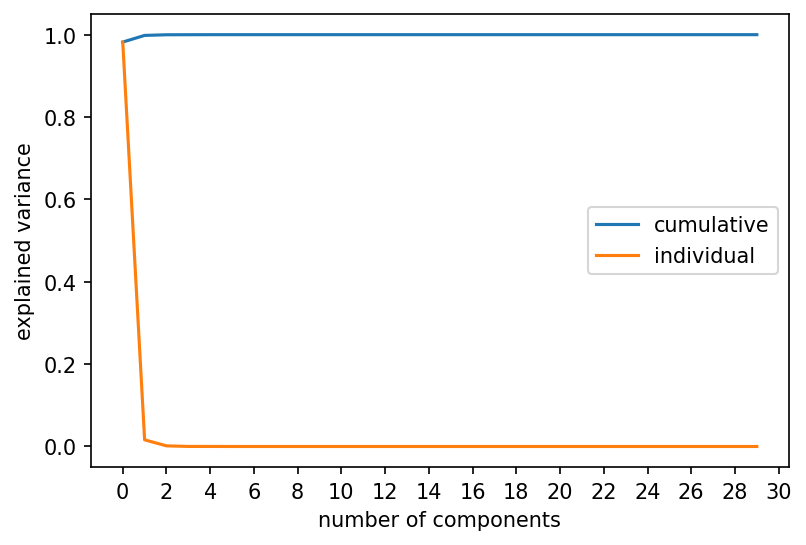

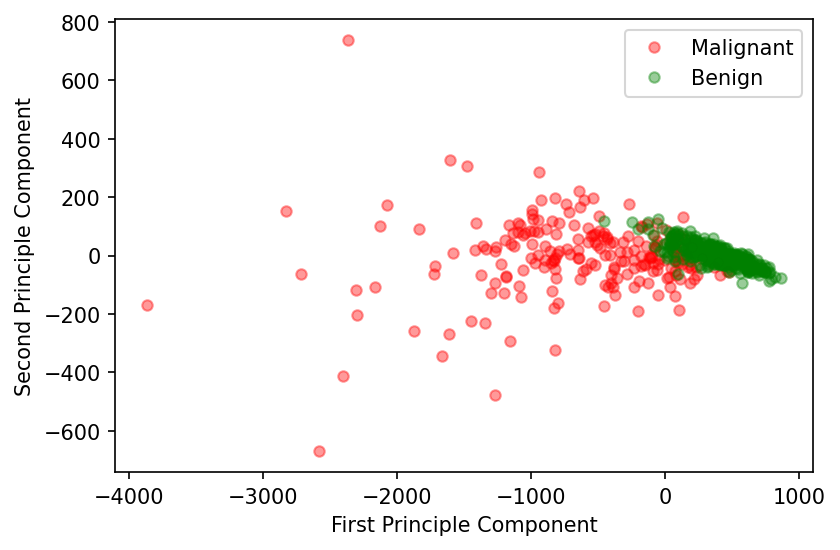

In [3]:
def problem16_6():

    #########################
    # Part 1 and 2
    #########################
    # load in data
    cancer = load_breast_cancer()
    X = cancer.data
    X -= X.mean(0)
    y = cancer.target


    #########################
    # Part 3
    #########################
    pca = PCA(X)
    # total variance
    total_variance = np.sum(pca.VPDs)
    # cumulative total variacne as a percentage
    cumulative = [np.sum(pca.VPDs[:i]) for i in range(1, pca.d+1)] /total_variance

    # plot scree plot and cumulative variance explained
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(cumulative, label='cumulative')
    ax.plot(pca.VPDs/total_variance, label='individual')
    ax.legend(loc='best')
    ax.set_xlabel('number of components')
    ax.set_ylabel('explained variance')
    ax.set_xticks(np.arange(0, 31, 2).astype(int))
    plt.show()

    #########################
    # Part 4
    #########################

    # perform pca
    pca = PCA(X, s=2)
    X_hat = pca._transform(X)

    # plot
    maskM = y == 0
    maskB = y == 1

    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(X_hat[maskM, 0], X_hat[maskM, 1], 'ro', alpha = 0.4, markersize=5, label='Malignant')
    ax.plot(X_hat[maskB, 0], X_hat[maskB, 1], 'go', alpha = 0.4, markersize=5, label='Benign')
    ax.set_xlabel('First Principle Component')
    ax.set_ylabel('Second Principle Component')
    ax.legend(loc='best')

    plt.show()


    return

problem16_6()

##### part 2
For this data we will center the mean. 
THis is to make the covaraince of the design matrix more available to PCA.
The data isn't categorical so it doesn't need to be converted to MCA. 
The breast cancer dataset doesn't need normailization as every feature is measuring something in consistent units.

#### part 3
As we can see $s = 2 \ll d = 30$ is a good value of $s$ that explains almost all of the variance. 


#### part 4
Doing a PCA with $s = 2$ performed pretty well as we can see it is able to separate a lot of the data. We can see the separation in the scatter plot above. 
Similarly the scree and cumulative variance plots show that almost all of the variance is explained by the first two principal components. 